# Importing some utilities

In [1]:
%cd ../..
import glob
import sys
from dmg.realism.mle import whichFitsBetter
from scripts.modelSet import datasets_supported
msetObject = datasets_supported['yakindu-exercise']
train_path = 'data/yakindu-exercise/train'
backend = 'python'

/home/antolin/wakame/DMG-Python


# Loading Training set

In [2]:
Gs = [msetObject.getGraphReal(f,backend) 
                for f in glob.glob(train_path + "/*")]

# Random EMF

For each rule in RandomEMF, depending on the type of rule, we estimate its parameters. More concretely, for shapes we use the function `whichFitsBetter` that selects the best distribuntion by using maximum likeihood. For priorities in alternative rules, the procedure described in the paper is done and it is based on counting each different alternative in the set $R_{II}$.

## Number of regions per statechart

For the rule:

```
Root : Statechart ->
		regions += RegionsStatechart#Distribution(parameters)
	; 
```

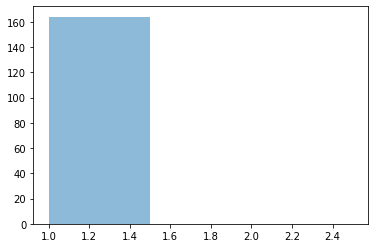

In [3]:
import matplotlib.pyplot as plt
import numpy as np

nums = []
for G in Gs:
    nums.append(G.out_degree(0))
bins = np.arange(1, 3, 0.5)
plt.hist(nums, bins = bins, alpha=0.5, density = False)
print()

In [4]:
whichFitsBetter(nums)

/home/antolin/wakame/DMG-Python/dmg/realism/mle.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  p = self.endog.mean() / self.endog.var()
/home/antolin/wakame/DMG-Python/dmg/realism/mle.py:25: RuntimeWarning: invalid value encountered in double_scalars
  r = p * self.endog.mean() / (1-p)
/home/antolin/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:699: RuntimeWarning: invalid value encountered in subtract
  if (np.max(np.ravel(np.abs(sim[1:] - sim[0]))) <= xatol and
/home/antolin/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:704: RuntimeWarning: invalid value encountered in subtract
  xr = (1 + rho) * xbar - rho * sim[-1]
/home/antolin/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:746: RuntimeWarning: invalid value encountered in subtract
  sim[j] = sim[0] + sigma * (sim[j] - sim[0])


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/tools/numdiff.py:353: RuntimeWarning: invalid value encountered in subtract
  - f(*((x + ee[i, :] - ee[j, :],) + args), **kwargs)
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/tools/numdiff.py:355: RuntimeWarning: invalid value encountered in subtract
  - f(*((x - ee[i, :] - ee[j, :],) + args), **kwargs))
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/tools/numdiff.py:354: RuntimeWarning: invalid value encountered in subtract
  - (f(*((x - ee[i, :] + ee[j, :],) + args), **kwargs)
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likel

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 10
         Function evaluations: 20


/home/antolin/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1769: RuntimeWarning: overflow encountered in true_divide
  place(output, cond, self._pdf(*goodargs) / scale)
/home/antolin/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/home/antolin/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:243: RuntimeWarning: overflow encountered in square
  return np.exp(-x**2/2.0) / _norm_pdf_C
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization f

{'dis': 'norm', 'params': (1.0, 4.6586061219825e-311)}

## Number of regions per state

For the rule:

```
	RState (Region r) : State ->
		regions += RegionsState#Distribution(parameters)
	;
	
```

(array([7.87302871e-01, 2.09057825e-01, 3.23493732e-03, 0.00000000e+00,
        4.04367165e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

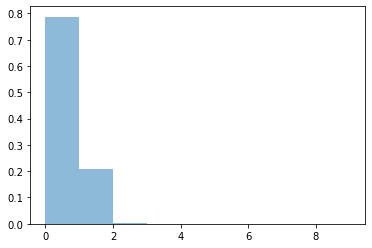

In [5]:
numberSubvertex = []
for G in Gs:
    for n in G:
        if G.nodes[n]['type'] =='State':
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'regions'):
                        cont = cont + 1
            numberSubvertex.append(cont)
            
bins = np.arange(0, 10, 1)
plt.hist(numberSubvertex, bins = bins, alpha=0.5, density = True)

In [6]:
best = whichFitsBetter(numberSubvertex)
print(best)
#lambda_= best['params']
#print(r,p)
#print(best)

Optimization terminated successfully.
         Current function value: 0.565180
         Iterations: 16
         Function evaluations: 33
Optimization terminated successfully.
         Current function value: 0.552294
         Iterations: 8
         Function evaluations: 16
{'dis': 'poisson', 'params': 0.21714516781237364}


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


## Type of vertices

For the rule:

```
	alter Vertices (Region r) : Vertex ->
		 RPseudoState(r)#a | RRegularState(r)#b
	;
	
```

In [7]:
import numpy as np
ps = []
for G in Gs:
    p = [0, 0]
    for n in G:
        if (G.nodes[n]['type'] == 'FinalState'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'State'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'Synchronization'):
            p[1] = p[1] + 1
        if (G.nodes[n]['type'] == 'Choice'):
            p[1] = p[1] + 1
        if (G.nodes[n]['type'] == 'Exit'):
            p[1] = p[1] + 1
        if (G.nodes[n]['type'] == 'Entry'):
            p[1] = p[1] + 1
    p = np.array(p)
    ps.append(p/np.sum(p))
ps = np.array(ps)
print(np.mean(ps, axis = 0)/np.min(np.mean(ps, axis = 0)))

[1.         1.16115923]


For the rule:

```
	alter RRegularState (Region r) : RegularState ->
		RFinal#a | RState(r)#b 
	;
	
```

In [8]:
ps = []
for G in Gs:
    p = [0, 0]
    for n in G:
        if (G.nodes[n]['type'] == 'FinalState'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'State'):
            p[1] = p[1] + 1
    p = np.array(p)
    ps.append(p/np.sum(p))
ps = np.array(ps)
print(np.mean(ps, axis = 0)/np.min(np.mean(ps, axis = 0)))

[  1.        319.2625641]


For the rule:

```
	alter RPseudoState(Region r) : Pseudostate ->
		 RTypeSynchronization(r)#a  | RTypeExit#b | RTypeChoice(r)#c
		 | if (r.vertices.filter[it instanceof Entry].size == 0 
		 	&& r.vertices.size > 0 
		 ) RTypeEntry(r)#d
	;
	
```

We want to estimate `a`, `b`, `c` and `d`.

In [9]:
ps = []
for G in Gs:
    p = [0, 0, 0, 0]
    for n in G:
        if (G.nodes[n]['type'] == 'Synchronization'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'Choice'):
            p[1] = p[1] + 1
        if (G.nodes[n]['type'] == 'Exit'):
            p[2] = p[2] + 1
        if (G.nodes[n]['type'] == 'Entry'):
            p[3] = p[3] + 1
    p = np.array(p)
    ps.append(p/np.sum(p))
ps = np.array(ps)

    
print(np.mean(ps, axis = 0)/0.01364875)

[ 0.         53.06380089  0.99999983 19.20298195]


## Transitions per state

For the rule:

```
	RState (Region r) : State ->
		outgoingTransitions += RTransition(self,r)#Distribution(parameters)
	;
	
```

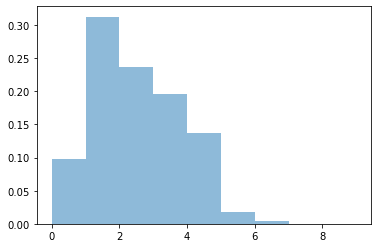

In [10]:
numberTransitions = []
for G in Gs:
    for n in G:
        if (G.nodes[n]['type'] == 'State'):
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'outgoingTransitions'):
                        cont = cont + 1
            numberTransitions.append(cont)
bins = np.arange(0, 10, 1)
plt.hist(numberTransitions, bins = bins, alpha=0.5, density = True)
print()

In [11]:
whichFitsBetter(numberTransitions)

Optimization terminated successfully.
         Current function value: 1.673394
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1.651149
         Iterations: 11
         Function evaluations: 22


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


{'dis': 'poisson', 'params': 2.0299231702385767}

For the rule:

```
	RTypeChoice (Region r) : Choice->
		outgoingTransitions += RTransition(self,r)#Distribution(parameters)
	;
	
```

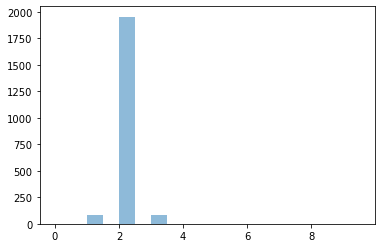

In [12]:
numberTransitions = []
for G in Gs:
    for n in G:
        if (G.nodes[n]['type'] == 'Choice'):
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'outgoingTransitions'):
                        cont = cont + 1
            numberTransitions.append(cont)
bins = np.arange(0, 10, 0.5)
plt.hist(numberTransitions, bins = bins, alpha=0.5, density = False)
print()

In [13]:
whichFitsBetter(numberTransitions)

Optimization terminated successfully.
         Current function value: 0.165460
         Iterations: 19
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: 1.323936
         Iterations: 11
         Function evaluations: 22


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


{'dis': 'norm', 'params': (2.0032987747408106, 0.2855100340385085)}

In [14]:
0.2855100340385085**2

0.08151597953667028

## Number vertex per region

## Statechart

For the rule:

```
	RegionsStatechart : Region ->
		vertices += Vertices(self)#Distribution(parameters)
	;
	
```

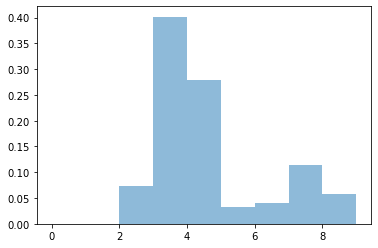

In [15]:
def fromStateChart(G,n):
    for m in G:
        if (G.nodes[m]['type'] == 'Statechart'):
            try:
                for e in G[m][n]:
                    if (G[m][n][e]['type'] == 'regions'):
                        return True
            except:
                return False
    return False

numberVert = []
for G in Gs:
    for n in G:
        if (G.nodes[n]['type'] == 'Region') and (fromStateChart(G,n)):
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'vertices'):
                        cont = cont + 1
            numberVert.append(cont)
bins = np.arange(0, 10, 1)
plt.hist(numberVert, bins = bins, alpha=0.5, density = True)
print()

In [16]:
print(whichFitsBetter(numberVert))

Optimization terminated successfully.
         Current function value: 3.164103
         Iterations: 35
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 3.574493
         Iterations: 27
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: 5.224871
         Iterations: 14
         Function evaluations: 28
{'dis': 'nbinom', 'params': (2.0, 0.15893714889198218)}


## State

For the rule:

```
	RegionsState : Region ->
		vertices += Vertices(self)#Distribution(parameters)
	;
	
```

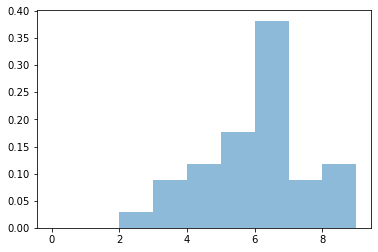

In [17]:
def fromState(G,n):
    for m in G:
        if (G.nodes[m]['type'] == 'State'):
            try:
                for e in G[m][n]:
                    if (G[m][n][e]['type'] == 'regions'):
                        return True
            except:
                return False
    return False

numberVert = []
for G in Gs:
    for n in G:
        if (G.nodes[n]['type'] == 'Region') and (fromState(G,n)):
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'vertices'):
                        cont = cont + 1
            numberVert.append(cont)
bins = np.arange(0, 10, 1)
plt.hist(numberVert, bins = bins, alpha=0.5, density = True)
print()

In [18]:
whichFitsBetter(numberVert)

Optimization terminated successfully.
         Current function value: 2.956993
         Iterations: 43
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 2.929832
         Iterations: 26
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: 3.111857
         Iterations: 14
         Function evaluations: 28


{'dis': 'uniform', 'params': (2, 18)}